<a href="https://colab.research.google.com/github/Cordoba89/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Filosofía', 'Ciudadanía']

# Generar datos aleatorios para 100 alumnos
num_alumnos = 100
data = []

for _ in range(num_alumnos):
  apellido = 'Apellido' + str(random.randint(1, 100))
  nombre = 'Nombre' + str(random.randint(1, 100))
  dni = random.randint(10000000, 99999999)

  for materia in materias:
      nota1 = random.randint(1, 10)
      nota2 = random.randint(1, 10)
      nota3 = random.randint(1, 10)
      faltas = random.randint(0, 20)
      data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

print(df.head())
df.shape

     Apellido    Nombre       DNI              Materia  Nota 1er Trimestre  \
0  Apellido52  Nombre32  27954982           Matemática                   7   
1  Apellido52  Nombre32  27954982  Lengua y Literatura                   3   
2  Apellido52  Nombre32  27954982             Historia                   3   
3  Apellido52  Nombre32  27954982            Geografía                  10   
4  Apellido52  Nombre32  27954982   Ciencias Naturales                   8   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   5                   7               10  
1                   8                   5               19  
2                   4                   5                8  
3                   6                   6                7  
4                   6                   2               20  


(1200, 8)

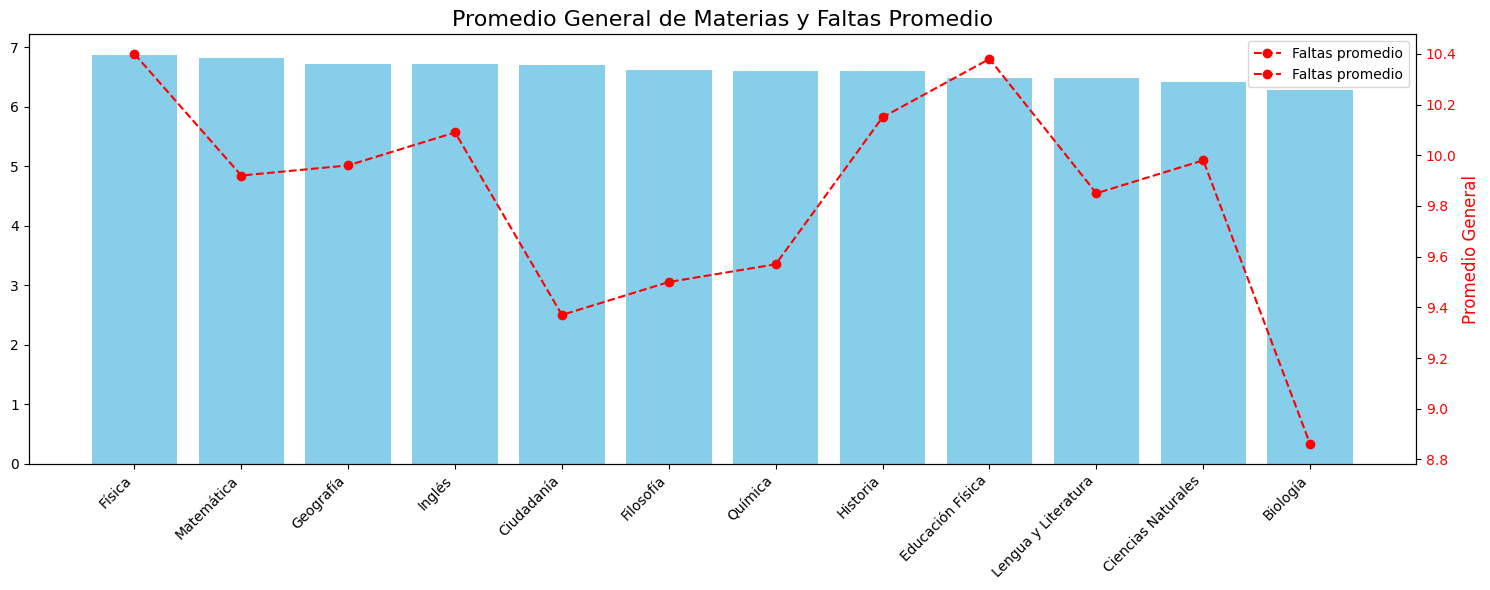

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a clases': 'mean'})
promedios_materias['Promedio General'] = promedios_materias.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedios_materias = promedios_materias.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))  # Ajustar tamaño del gráfico para mejor visualización
plt.bar(promedios_materias.index, promedios_materias['Promedio General'], color='skyblue', label='Promedio General')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad


# Segundo eje para las faltas
ax2 = plt.twinx()
ax2.plot(promedios_materias.index, promedios_materias['Faltas a clases'], color='red', marker='o', linestyle='--', label='Faltas promedio')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Agregar título y leyendas
plt.title('Promedio General de Materias y Faltas Promedio', fontsize=16)
plt.xlabel('Materias', fontsize=12)
plt.ylabel('Promedio General', fontsize=12)

# Combinar las leyendas de ambos ejes
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)
